In [1]:
import re
import math
import pandas as pd
import ast


In [2]:
import re

def extract_tensor_values(sparsities_str):
    # Split the string into individual tensor strings
    tensor_strings = sparsities_str.strip('()').split('), ')
    
    # Extract the numeric value from each tensor string
    values = []
    for tensor_str in tensor_strings:
        match = re.search(r"tensor\(([\d.]+)", tensor_str)
        if match:
            values.append(float(match.group(1)))
    
    return values

def extract_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = {}
    for line in lines:
        match = re.match(r"Deepsets (\w+) Model (\d+)-Bit QAT Model Prune Iter: (\d+)", line)
        if match:
            model_name, bit_width, iteration = match.groups()
            full_model_name = f"Deepsets {model_name} Model {bit_width}-Bit QAT Model"
            
            if full_model_name not in data:
                data[full_model_name] = []
            # Deepsets Large Model 32-Bit QAT Model Prune Iter: 0, Test Accuracy: 0.6592771657287786, Val Accuracy: 0.6629127118150585, Val Loss: 0.8871866736282297, Phi Sparsities: (tensor(0., device='cuda:0'), tensor(0., device='cuda:0')), Rho Sparsities: (tensor(0., device='cuda:0'), tensor(0., device='cuda:0'), tensor(0., device='cuda:0'))

            
            test_accuracy = float(re.search(r"Test Accuracy: ([\d.]+)", line).group(1))
            val_accuracy = float(re.search(r"Val Accuracy: ([\d.]+)", line).group(1))
            val_loss = float(re.search(r"Val Loss: ([\d.]+)", line).group(1))




            # print(test_accuracy, val_accuracy, val_loss)
            
            # Extract sparsities as strings
            phi_sparsities_str = re.search(r"Phi Sparsities: (.*?) Rho Sparsities:", line).group(1)
            rho_sparsities_str = re.search(r"Rho Sparsities: (.*?)$", line).group(1)

            # print("phi_sparsities", phi_sparsities_str, "rho_sparsities", rho_sparsities_str)

            phi_sparsities = extract_tensor_values(phi_sparsities_str)
            rho_sparsities = extract_tensor_values(rho_sparsities_str)

            print("phi_sparsities:", phi_sparsities, "rho_sparsities:", rho_sparsities)





# Main execution
file_path = '/Users/dimademler/Downloads/NAC_Compress2.txt'
data = extract_data(file_path)

phi_sparsities: [0.0, 0.0] rho_sparsities: [0.0, 0.0, 0.0]
phi_sparsities: [0.1771, 0.2021] rho_sparsities: [0.207, 0.1943, 0.2125]
phi_sparsities: [0.2396, 0.3672] rho_sparsities: [0.3701, 0.3579, 0.3531]
phi_sparsities: [0.3333, 0.4873] rho_sparsities: [0.5068, 0.4888, 0.4719]
phi_sparsities: [0.3646, 0.6084] rho_sparsities: [0.6094, 0.585, 0.575]
phi_sparsities: [0.4271, 0.6943] rho_sparsities: [0.6953, 0.6655, 0.6469]
phi_sparsities: [0.4583, 0.7637] rho_sparsities: [0.7559, 0.7349, 0.7031]
phi_sparsities: [0.5, 0.8213] rho_sparsities: [0.8145, 0.7837, 0.7438]
phi_sparsities: [0.5312, 0.8701] rho_sparsities: [0.8613, 0.8203, 0.7844]
phi_sparsities: [0.5521, 0.8955] rho_sparsities: [0.8984, 0.8589, 0.8031]
phi_sparsities: [0.6146, 0.9092] rho_sparsities: [0.915, 0.894, 0.8406]
phi_sparsities: [0.6875, 0.9199] rho_sparsities: [0.9297, 0.9185, 0.8844]
phi_sparsities: [0.7396, 0.9365] rho_sparsities: [0.9385, 0.9355, 0.9219]
phi_sparsities: [0.8021, 0.9463] rho_sparsities: [0.9492, 0.9

In [3]:
import re

def extract_tensor_values(sparsities_str):
    tensor_strings = sparsities_str.strip('()').split('), ')
    values = []
    for tensor_str in tensor_strings:
        match = re.search(r"tensor\(([\d.]+)", tensor_str)
        if match:
            values.append(float(match.group(1)))
    return values

def extract_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = {}
    for line in lines:
        match = re.match(r"Deepsets (\w+) Model (\d+)-Bit QAT Model Prune Iter: (\d+)", line)
        if match:
            model_name, bit_width, iteration = match.groups()
            full_model_name = f"Deepsets {model_name} Model {bit_width}-Bit QAT Model"
            
            if full_model_name not in data:
                data[full_model_name] = {
                    'bit_width': [],
                    'iteration': [],
                    'test_accuracy': [],
                    'val_accuracy': [],
                    'val_loss': [],
                    'phi_sparsities': [],
                    'rho_sparsities': []
                }
            
            test_accuracy = float(re.search(r"Test Accuracy: ([\d.]+)", line).group(1))
            val_accuracy = float(re.search(r"Val Accuracy: ([\d.]+)", line).group(1))
            val_loss = float(re.search(r"Val Loss: ([\d.]+)", line).group(1))
            
            phi_sparsities_str = re.search(r"Phi Sparsities: (.*?) Rho Sparsities:", line).group(1)
            rho_sparsities_str = re.search(r"Rho Sparsities: (.*?)$", line).group(1)

            phi_sparsities = extract_tensor_values(phi_sparsities_str)
            rho_sparsities = extract_tensor_values(rho_sparsities_str)

            # Append data to the respective lists
            data[full_model_name]['bit_width'].append(int(bit_width))
            data[full_model_name]['iteration'].append(int(iteration))
            data[full_model_name]['test_accuracy'].append(test_accuracy)
            data[full_model_name]['val_accuracy'].append(val_accuracy)
            data[full_model_name]['val_loss'].append(val_loss)
            data[full_model_name]['phi_sparsities'].append(phi_sparsities)
            data[full_model_name]['rho_sparsities'].append(rho_sparsities)

    return data

# Test the extraction
file_path = '/Users/dimademler/Downloads/NAC_Compress2.txt'
extracted_data = extract_data(file_path)

print(extracted_data.keys())
print(extracted_data['Deepsets Large Model 32-Bit QAT Model'].keys())
print(extracted_data['Deepsets Large Model 32-Bit QAT Model']['rho_sparsities'])

dict_keys(['Deepsets Large Model 32-Bit QAT Model', 'Deepsets Medium Model 32-Bit QAT Model'])
dict_keys(['bit_width', 'iteration', 'test_accuracy', 'val_accuracy', 'val_loss', 'phi_sparsities', 'rho_sparsities'])
[[0.0, 0.0, 0.0], [0.207, 0.1943, 0.2125], [0.3701, 0.3579, 0.3531], [0.5068, 0.4888, 0.4719], [0.6094, 0.585, 0.575], [0.6953, 0.6655, 0.6469], [0.7559, 0.7349, 0.7031], [0.8145, 0.7837, 0.7438], [0.8613, 0.8203, 0.7844], [0.8984, 0.8589, 0.8031], [0.915, 0.894, 0.8406], [0.9297, 0.9185, 0.8844], [0.9385, 0.9355, 0.9219], [0.9492, 0.9487, 0.9469], [0.957, 0.957, 0.9719], [0.9619, 0.9673, 0.9812], [0.9658, 0.9741, 0.9969], [0.9678, 0.9814, 0.9969], [0.9756, 0.9858, 0.9969], [0.9814, 0.9868, 0.9969]]


In [7]:
import re
import math

def extract_tensor_values(sparsities_str):
    tensor_strings = sparsities_str.strip('()').split('), ')
    values = []
    for tensor_str in tensor_strings:
        match = re.search(r"tensor\(([\d.]+)", tensor_str)
        if match:
            values.append(float(match.group(1)))
    return values

def get_linear_bops(in_features, out_features, sparsity, bit_width):
    effective_connections = in_features * out_features * (1 - sparsity)
    mult_bops = effective_connections * bit_width * bit_width
    add_bops = effective_connections * (2 * bit_width + math.ceil(math.log2(in_features)))
    return mult_bops + add_bops

def calculate_model_bops(model_name, phi_sparsities, rho_sparsities, bit_width):
    model_architectures = {
        'Large': {
            'phi': [(3, 32), (32, 32)],
            'rho': [(32, 32), (32, 64), (64, 5)]
        },
        'Medium': {
            'phi': [(3, 32), (32, 16)],
            'rho': [(16, 64), (64, 8), (8, 32), (32, 5)]
        },
        'Small': {
            'phi': [(3, 8), (8, 8)],
            'rho': [(8, 16), (16, 16), (16, 5)]
        },
        'Tiny': {
            'phi': [(3, 16)],
            'rho': [(16, 8), (8, 8), (8, 4), (4, 5)]
        }
    }

    architecture = model_architectures[model_name]
    total_bops = 0

    for (in_features, out_features), sparsity in zip(architecture['phi'], phi_sparsities):
        total_bops += get_linear_bops(in_features, out_features, sparsity, bit_width)

    for (in_features, out_features), sparsity in zip(architecture['rho'], rho_sparsities):
        total_bops += get_linear_bops(in_features, out_features, sparsity, bit_width)

    return total_bops

def extract_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = {}
    for line in lines:
        match = re.match(r"Deepsets (\w+) Model (\d+)-Bit QAT Model Prune Iter: (\d+)", line)
        if match:
            model_name, bit_width, iteration = match.groups()
            full_model_name = f"Deepsets {model_name} Model {bit_width}-Bit QAT Model"
            
            if full_model_name not in data:
                data[full_model_name] = {
                    'model_name': [],
                    'bit_width': [],
                    'iteration': [],
                    'test_accuracy': [],
                    'val_accuracy': [],
                    'val_loss': [],
                    'phi_sparsities': [],
                    'rho_sparsities': [],
                    'total_bops': [],
                    'net sparsity': []
                }
            
            test_accuracy = float(re.search(r"Test Accuracy: ([\d.]+)", line).group(1))
            val_accuracy = float(re.search(r"Val Accuracy: ([\d.]+)", line).group(1))
            val_loss = float(re.search(r"Val Loss: ([\d.]+)", line).group(1))
            
            phi_sparsities_str = re.search(r"Phi Sparsities: (.*?) Rho Sparsities:", line).group(1)
            rho_sparsities_str = re.search(r"Rho Sparsities: (.*?)$", line).group(1)

            phi_sparsities = extract_tensor_values(phi_sparsities_str)
            rho_sparsities = extract_tensor_values(rho_sparsities_str)

            # Calculate BOPs
            total_bops = calculate_model_bops(model_name, phi_sparsities, rho_sparsities, int(bit_width))

            net_sparsity = 1- 0.8**int(iteration)

            # Append data to the respective lists
            data[full_model_name]['model_name'].append(model_name)
            data[full_model_name]['bit_width'].append(int(bit_width))
            data[full_model_name]['iteration'].append(int(iteration))
            data[full_model_name]['test_accuracy'].append(test_accuracy)
            data[full_model_name]['val_accuracy'].append(val_accuracy)
            data[full_model_name]['val_loss'].append(val_loss)
            data[full_model_name]['phi_sparsities'].append(phi_sparsities)
            data[full_model_name]['rho_sparsities'].append(rho_sparsities)
            data[full_model_name]['total_bops'].append(total_bops)

            data[full_model_name]['net sparsity'].append(net_sparsity)

            print(f"total_bops: {total_bops:.2e}, net sparsity: {net_sparsity:.4f}")

    return data

# Test the extraction
file_path = '/Users/dimademler/Downloads/NAC_Compress2.txt'
extracted_data = extract_data(file_path)



total_bops: 4.93e+06, net sparsity: 0.0000
total_bops: 3.95e+06, net sparsity: 0.2000
total_bops: 3.16e+06, net sparsity: 0.3600
total_bops: 2.52e+06, net sparsity: 0.4880
total_bops: 2.02e+06, net sparsity: 0.5904
total_bops: 1.62e+06, net sparsity: 0.6723
total_bops: 1.29e+06, net sparsity: 0.7379
total_bops: 1.03e+06, net sparsity: 0.7903
total_bops: 8.27e+05, net sparsity: 0.8322
total_bops: 6.62e+05, net sparsity: 0.8658
total_bops: 5.30e+05, net sparsity: 0.8926
total_bops: 4.24e+05, net sparsity: 0.9141
total_bops: 3.39e+05, net sparsity: 0.9313
total_bops: 2.71e+05, net sparsity: 0.9450
total_bops: 2.16e+05, net sparsity: 0.9560
total_bops: 1.73e+05, net sparsity: 0.9648
total_bops: 1.38e+05, net sparsity: 0.9719
total_bops: 1.10e+05, net sparsity: 0.9775
total_bops: 8.86e+04, net sparsity: 0.9820
total_bops: 7.11e+04, net sparsity: 0.9856
total_bops: 2.80e+06, net sparsity: 0.0000


total_bops: 4.93e+06
total_bops: 3.95e+06
total_bops: 3.16e+06
total_bops: 2.52e+06
total_bops: 2.02e+06
total_bops: 1.62e+06
total_bops: 1.29e+06
total_bops: 1.03e+06
total_bops: 8.27e+05
total_bops: 6.62e+05
total_bops: 5.30e+05
total_bops: 4.24e+05
total_bops: 3.39e+05
total_bops: 2.71e+05
total_bops: 2.16e+05
total_bops: 1.73e+05
total_bops: 1.38e+05
total_bops: 1.10e+05
total_bops: 8.86e+04
total_bops: 7.11e+04
total_bops: 2.80e+06
Plot saved as ./plots/BOPs_vs_Accuracy_colored.png


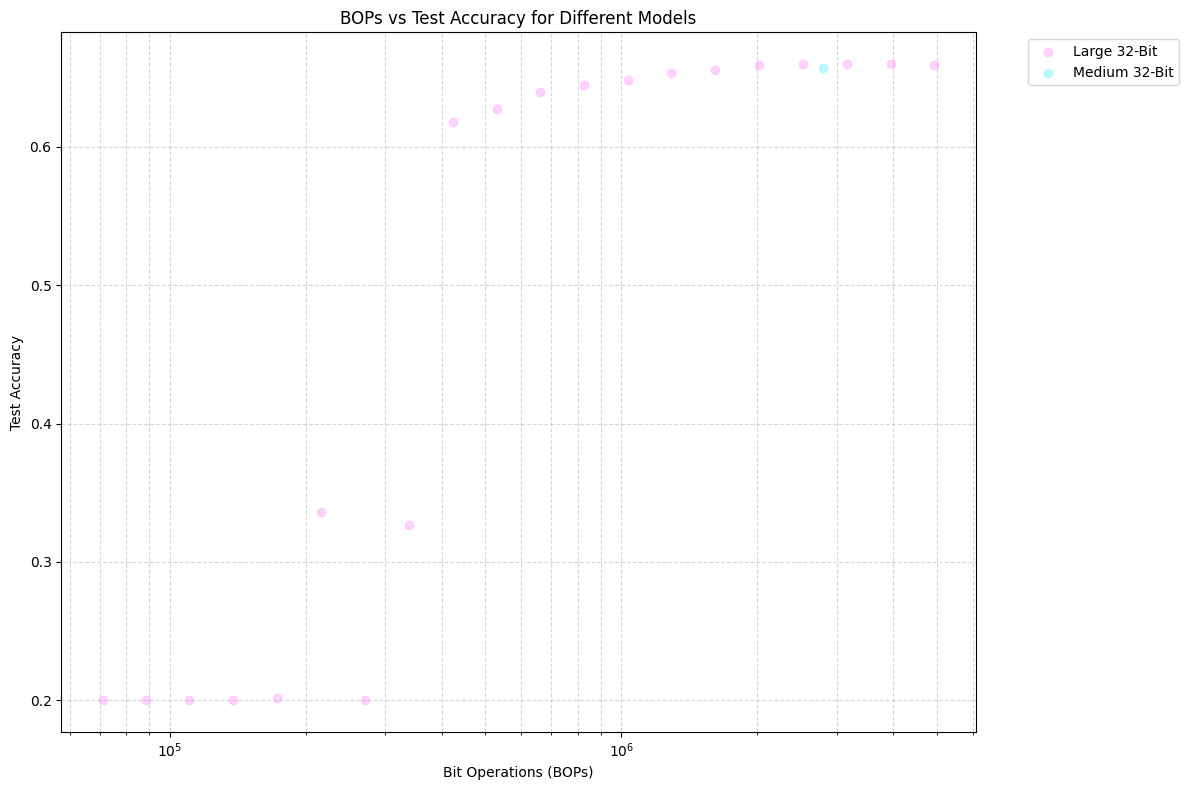

In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import re

def plot_bops_vs_accuracy(data, output_folder='./plots'):
    plt.figure(figsize=(12, 8))
    
    # Define the order of models from smallest to largest
    model_order = ['Tiny', 'Small', 'Medium', 'Large']
    
    color_families = {
        'Tiny': mcolors.CSS4_COLORS['lightcoral'],
        'Small': mcolors.CSS4_COLORS['lightgreen'],
        'Medium': mcolors.CSS4_COLORS['lightskyblue'],
        'Large': mcolors.CSS4_COLORS['plum']
    }

    # Define shade adjustments for different bit widths
    bit_width_shades = {
        4: 0.6,  # Darker
        6: 0.8,
        8: 1.0,  # OG color
        32: 1.2  # Lighter
    }

    for full_model_name, model_data in data.items():
        # Extract model size and bit width from the full model name
        match = re.match(r"Deepsets (\w+) Model (\d+)-Bit QAT Model", full_model_name)
        if match:
            model_size, bit_width = match.groups()
            bit_width = int(bit_width)

            if model_size in model_order:
                model_name = f'{model_size} {bit_width}-Bit'
                
                # Adjust color based on bit width
                base_color = mcolors.to_rgb(color_families[model_size])
                adjusted_color = [min(1, c * bit_width_shades[bit_width]) for c in base_color]
                
                plt.scatter(model_data['total_bops'], model_data['test_accuracy'], 
                            label=model_name, 
                            alpha=0.7, 
                            color=adjusted_color)

    plt.xscale('log') 
    plt.xlabel('Bit Operations (BOPs)')
    plt.ylabel('Test Accuracy')
    plt.title('BOPs vs Test Accuracy for Different Models')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which="both", ls="--", alpha=0.5)
    
    plt.tight_layout()
    
    plt.savefig(f'{output_folder}/BOPs_vs_Accuracy_colored.png', dpi=300, bbox_inches='tight')
    print(f"Plot saved as {output_folder}/BOPs_vs_Accuracy_colored.png")
    
    plt.show()

# Usage
file_path = '/Users/dimademler/Downloads/NAC_Compress2.txt'
extracted_data = extract_data(file_path)
plot_bops_vs_accuracy(extracted_data)